# * Logistic Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## In Financial Institutions getting their customers to do a fixed deposit in the banks is a vital and at most important for the bank as they bank uses it and pays an interest amount to those deposited customers. To ask every customer for a term deposit is not viable as well as time consuming process, can you come up with a Logistic Regression model to predict customers who will do a term deposit or not.  

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model to perform Logistic Regression on the given data and to predict customers who will do a term deposit or not.

## -------------------------------------------------------------------------------------------

## Step 1: Importing libraries and Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the libraries used in the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [4]:
bank = pd.read_csv(r"G:\360digit\assignments meterial\logistic regression\bank_data.csv")
bank.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 2: Inspecting Data

In [5]:
bank.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [7]:
# checking datatypes and null values in each columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [8]:
# shape of data
bank.shape

(45211, 32)

In [9]:
# statistical aspects of the dataframe
bank.describe(include='all')

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Preparing data and Visualization

#### Checking outliers:

Collecting the columns with continuous values in the dataframe and checking outliers for it

In [10]:
# collecting all the continuous valued columns in a dataframe
check_out = bank[['age','balance','duration']]
check_out.head()

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198


In [11]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080
std,10.618762,3044.765829,257.527812
min,18.000000,-8019.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
90%,56.000000,3574.000000,548.000000
95%,59.000000,5768.000000,751.000000
99%,71.000000,13164.900000,1269.000000


<AxesSubplot:ylabel='duration'>

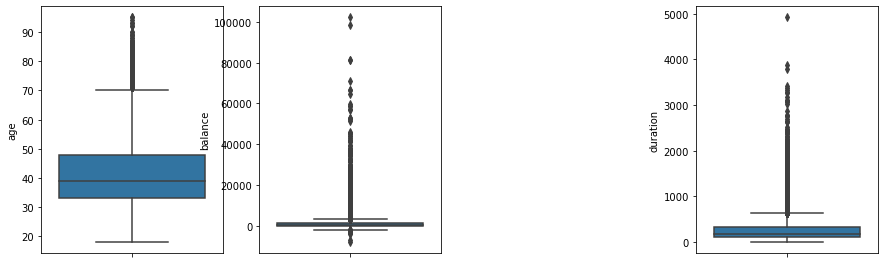

In [12]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)

There are lot of outliers present in the dataframe but we can't drop them because of the very large quantity and are important for model making

<AxesSubplot:>

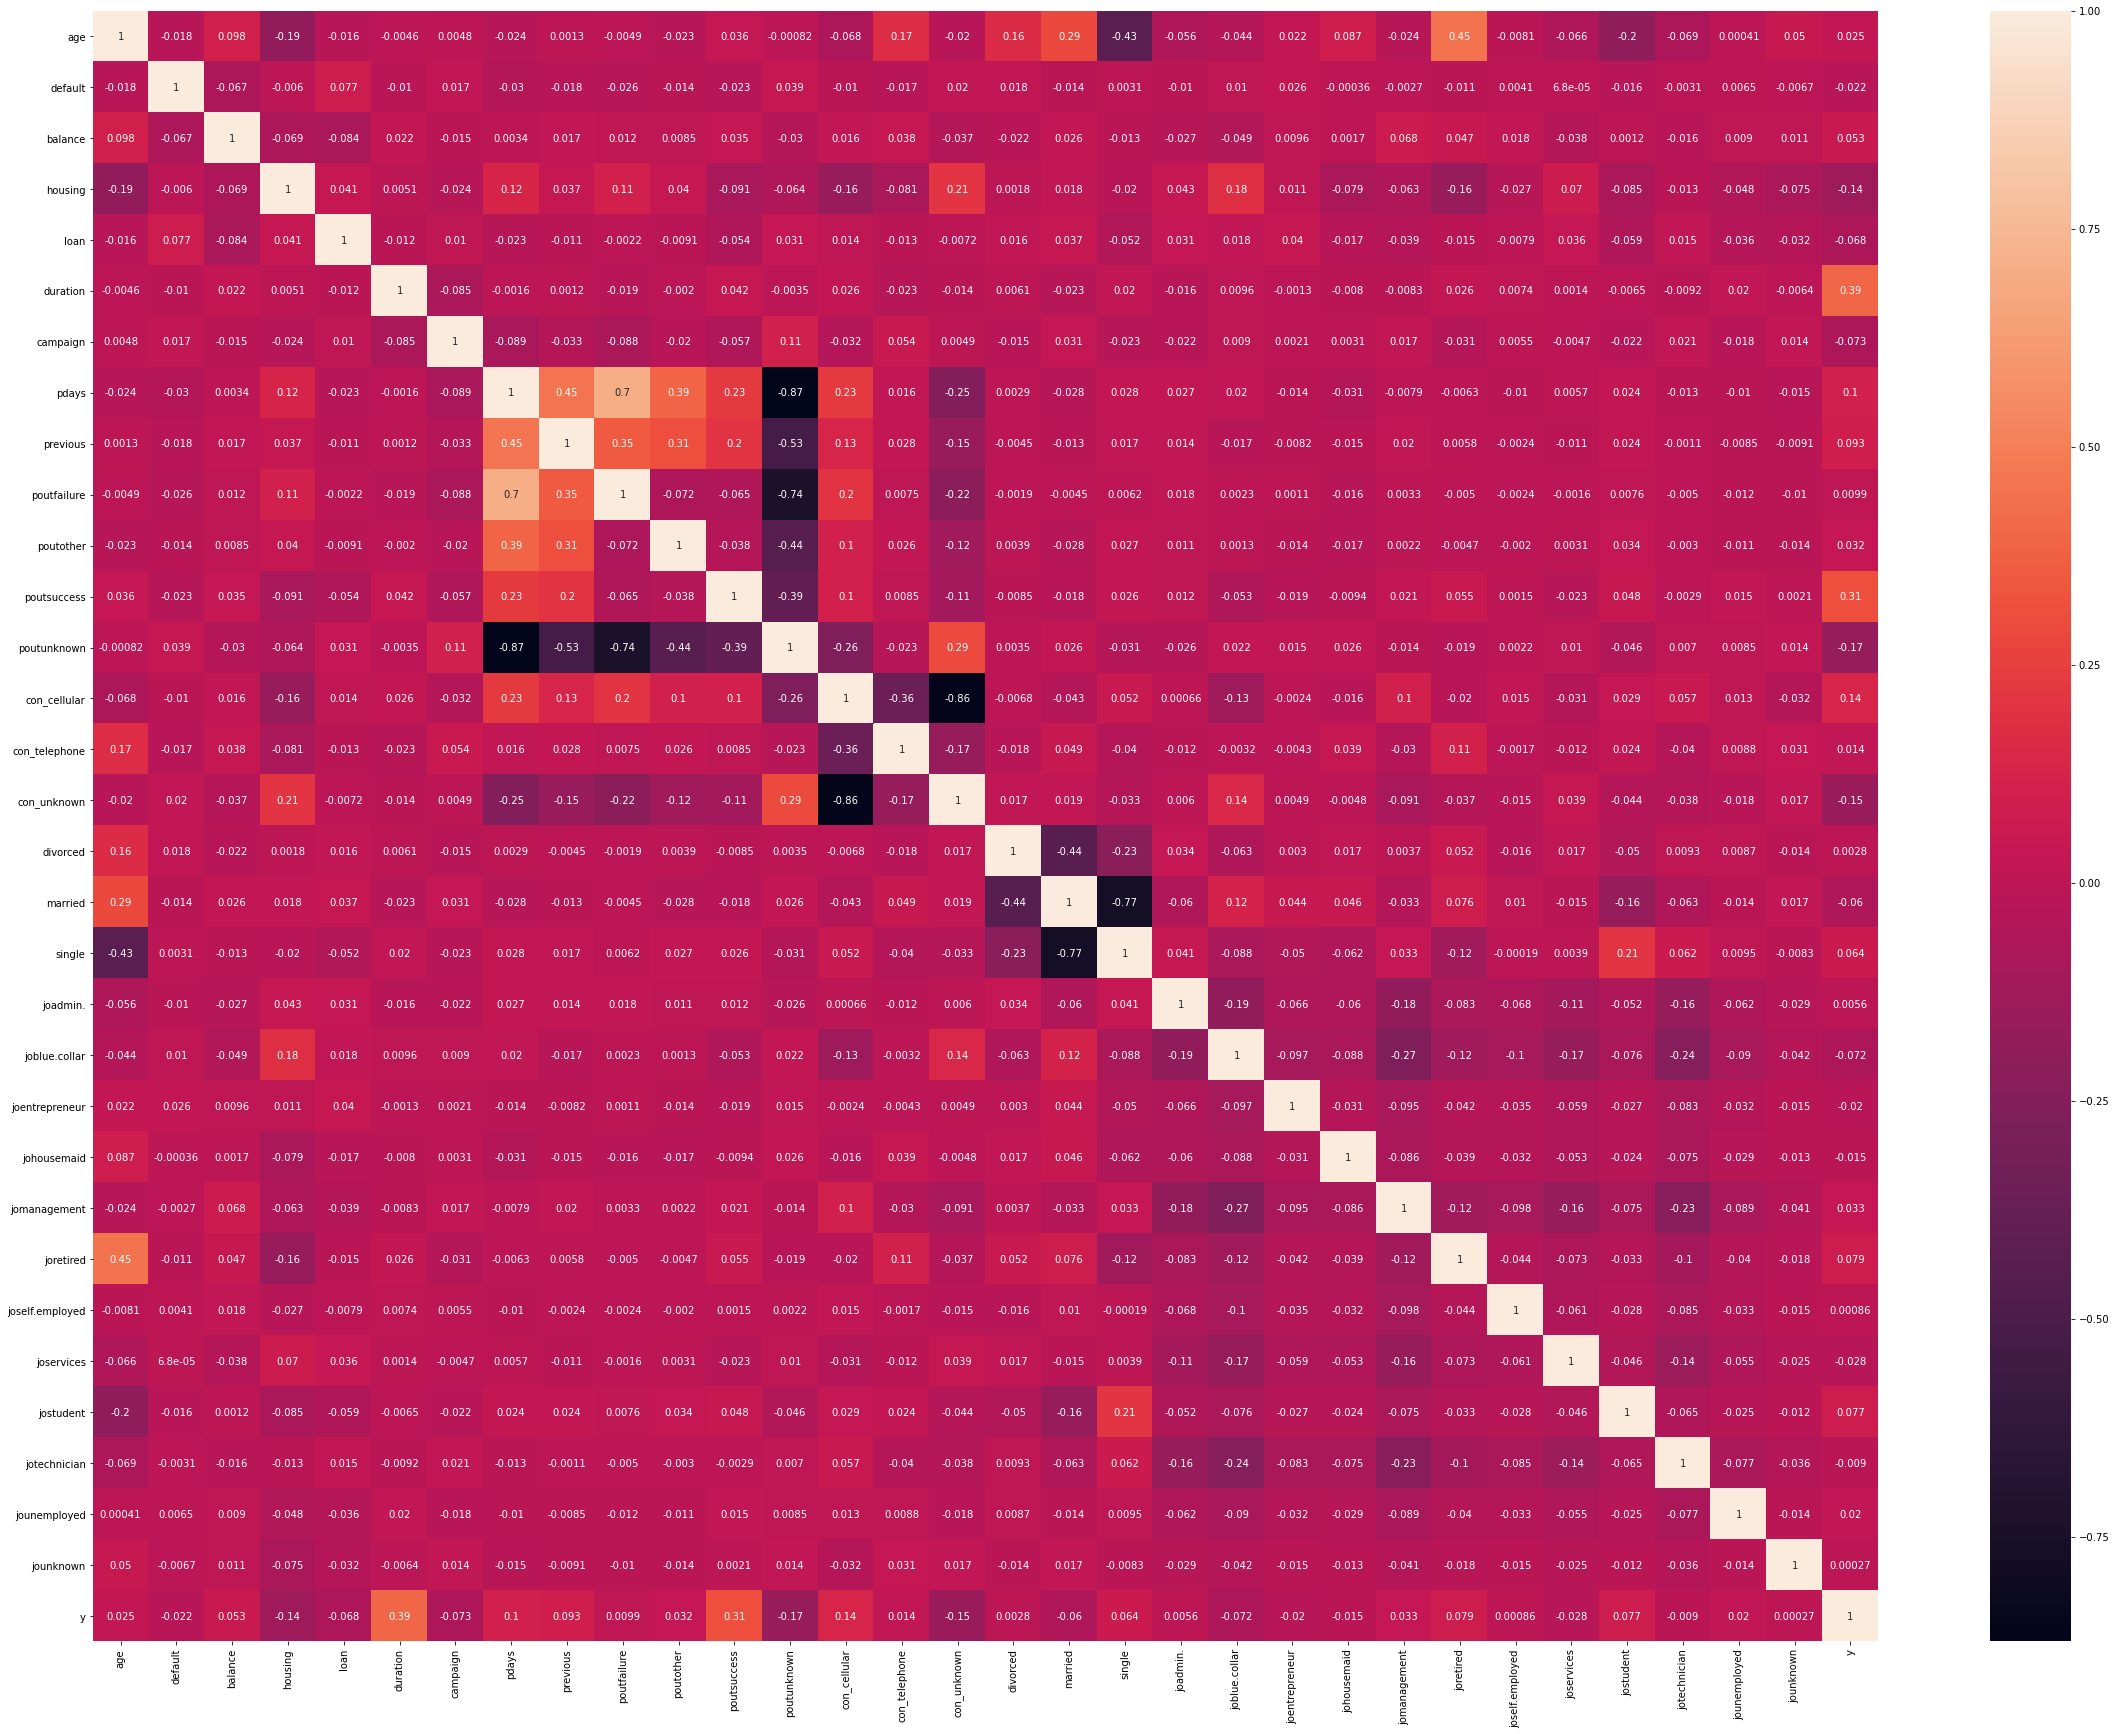

In [13]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True)

We are not gonna drop any column because none of the column is very highly correlated with the target column

In [14]:
bank.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# subscription rate
round((sum(bank['y'])/len(bank.index))*100,2)

11.7

- This shows that approximately 12% people are subscribed to the bank term deposit

##### Splitting the target variable and the predictor features in two different dataframes from Train Test Split:

In [16]:
# X will have all the features
X = bank.drop(['y'],1)
# Y will have the target variable
Y = bank['y']

In [17]:
X.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Step 3: Train Test Split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

###### Splitting the data in train and test dataframe in the ratio of 7:3

## Step 4: Feature Scaling

In [20]:
scaler = StandardScaler()

x_train[['age', 'balance','duration']] = scaler.fit_transform(x_train[['age','balance','duration']])

In [21]:
x_train.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
18391,-0.087715,0,1.103100,0,0,-0.093607,2,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
13056,-1.404878,0,-0.555004,0,1,-0.360990,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
13415,1.041282,0,0.655212,1,0,-0.248612,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
21022,-0.181798,0,-0.223447,0,0,0.150526,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
24510,0.853116,0,-0.172097,0,0,-0.725251,1,138,2,1,...,0,0,1,0,0,0,0,0,0,0


## Step 5: Model Building

###### Buiding first logistic regression model

In [22]:
# logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31619
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7875.8
Date:                Mon, 19 Apr 2021   Deviance:                       15752.
Time:                        21:44:13   Pearson chi2:                 1.29e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5919      0.042    -14.169      0.000      -0.674      -0.510
age                 0.0276      0.027      1.020      0.308      -0.025       0.081
default            -0.3286      0.207     -1.590      0.112      -0.734       0.076
balance             0.0599      0.017      3.517      0.000       0.027       0.093
housing            -0.7827      0.047    -16.484      0.000      -0.876      -0.690
loan               -0.5828      0.070     -8.285      0.000      -0.721      -0.445
duration            1.0484      0.019     54.134      0.000       1.010       1.086
campaign           -0.0968      0.011     -8.458      0.000      -0.119      -0.074
pdays              -0.0003      0.000     -0.832      0.405      -0.001       0.000
previous            0.0067      0.006      1.057      0.290      -0.006       0.019
poutfailure        -0.6832      0.063    -10.883      0.000      -0.806      -0.560
poutother          -0.4727      0.079     -6.002      0.000      -0.627      -0.318
poutsuccess         1.6312      0.062     26.325      0.000       1.510       1.753
poutunknown        -1.0672      0.062    -17.112      0.000      -1.189      -0.945
con_cellular        0.2507      0.035      7.066      0.000       0.181       0.320
con_telephone       0.1179      0.064      1.845      0.065      -0.007       0.243
con_unknown        -0.9606      0.055    -17.386      0.000      -1.069      -0.852
divorced           -0.2382      0.051     -4.666      0.000      -0.338      -0.138
married            -0.3600      0.033    -10.955      0.000      -0.424      -0.296
single              0.0063      0.039      0.161      0.872      -0.070       0.083
joadmin.            0.0712      0.065      1.091      0.275      -0.057       0.199
joblue.collar      -0.2973      0.061     -4.898      0.000      -0.416      -0.178
joentrepreneur     -0.3616      0.127     -2.853      0.004      -0.610      -0.113
johousemaid        -0.4569      0.135     -3.383      0.001      -0.722      -0.192
jomanagement        0.0265      0.051      0.519      0.604      -0.074       0.127
joretired           0.3776      0.089      4.219      0.000       0.202       0.553
joself.employed    -0.2482      0.110     -2.264      0.024      -0.463      -0.033
joservices         -0.2100      0.079     -2.664      0.008      -0.364      -0.055
jostudent           0.6946      0.109      6.380      0.000       0.481       0.908
jotechnician       -0.1679      0.058     -2.894      0.004      -0.282      -0.054
jounemployed       -0.0513      0.109     -0.473      0.637      -0.264       0.161
jounknown           0.0315      0.222      0.142      0.887      -0.404       0.467
===================================================================================
"""

## Step 6: Feature Selection using RFE

In [23]:
logreg = LogisticRegression()

In [28]:
# Running RFE with 11 variables as output
rfe = RFE(logreg,20)
rfe = rfe.fit(x_train,y_train)

In [29]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 9),
 ('default', True, 1),
 ('balance', False, 8),
 ('housing', True, 1),
 ('loan', True, 1),
 ('duration', True, 1),
 ('campaign', False, 3),
 ('pdays', False, 12),
 ('previous', False, 11),
 ('poutfailure', True, 1),
 ('poutother', True, 1),
 ('poutsuccess', True, 1),
 ('poutunknown', True, 1),
 ('con_cellular', True, 1),
 ('con_telephone', True, 1),
 ('con_unknown', True, 1),
 ('divorced', False, 7),
 ('married', False, 2),
 ('single', True, 1),
 ('joadmin.', False, 4),
 ('joblue.collar', True, 1),
 ('joentrepreneur', True, 1),
 ('johousemaid', True, 1),
 ('jomanagement', False, 6),
 ('joretired', True, 1),
 ('joself.employed', True, 1),
 ('joservices', True, 1),
 ('jostudent', True, 1),
 ('jotechnician', True, 1),
 ('jounemployed', False, 10),
 ('jounknown', False, 5)]

In [30]:
col1 = x_train.columns[rfe.support_]
col1

Index(['default', 'housing', 'loan', 'duration', 'poutfailure', 'poutother',
       'poutsuccess', 'poutunknown', 'con_cellular', 'con_telephone',
       'con_unknown', 'single', 'joblue.collar', 'joentrepreneur',
       'johousemaid', 'joretired', 'joself.employed', 'joservices',
       'jostudent', 'jotechnician'],
      dtype='object')

In [31]:
x_train.columns[~rfe.support_]

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'divorced',
       'married', 'joadmin.', 'jomanagement', 'jounemployed', 'jounknown'],
      dtype='object')

###### Assessing the model with StatsModels:

In [32]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31628
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7929.0
Date:                Mon, 19 Apr 2021   Deviance:                       15858.
Time:                        21:46:39   Pearson chi2:                 1.24e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9269      0.038    -24.678      0.000      -1.000      -0.853
default            -0.3779      0.205     -1.842      0.065      -0.780       0.024
housing            -0.7822      0.046    -16.885      0.000      -0.873      -0.691
loan               -0.5958      0.070     -8.505      0.000      -0.733      -0.459
duration            1.0491      0.019     54.492      0.000       1.011       1.087
poutfailure        -0.7641      0.053    -14.502      0.000      -0.867      -0.661
poutother          -0.5718      0.072     -7.896      0.000      -0.714      -0.430
poutsuccess         1.5791      0.061     26.088      0.000       1.460       1.698
poutunknown        -1.1701      0.034    -34.001      0.000      -1.238      -1.103
con_cellular        0.1427      0.033      4.389      0.000       0.079       0.206
con_telephone      -0.0161      0.062     -0.258      0.796      -0.138       0.106
con_unknown        -1.0535      0.056    -18.890      0.000      -1.163      -0.944
single              0.3400      0.047      7.232      0.000       0.248       0.432
joblue.collar      -0.3522      0.064     -5.472      0.000      -0.478      -0.226
joentrepreneur     -0.3973      0.138     -2.873      0.004      -0.668      -0.126
johousemaid        -0.4710      0.146     -3.218      0.001      -0.758      -0.184
joretired           0.4496      0.084      5.368      0.000       0.285       0.614
joself.employed    -0.2827      0.119     -2.383      0.017      -0.515      -0.050
joservices         -0.2611      0.085     -3.087      0.002      -0.427      -0.095
jostudent           0.6472      0.114      5.690      0.000       0.424       0.870
jotechnician       -0.2196      0.062     -3.558      0.000      -0.341      -0.099
===================================================================================
"""

In [33]:
# predicted values of the train dataset giving the probability
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.082818
13056    0.069860
13415    0.038534
21022    0.189022
24510    0.090374
14062    0.025903
16250    0.040492
16330    0.028575
35883    0.069437
12306    0.014891
dtype: float64

In [34]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08281755, 0.06986028, 0.03853376, 0.18902201, 0.0903741 ,
       0.02590256, 0.04049227, 0.02857485, 0.06943715, 0.01489092])

###### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [35]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.082818,18391
1,0,0.069860,13056
2,0,0.038534,13415
3,0,0.189022,21022
4,0,0.090374,24510
5,0,0.025903,14062
6,0,0.040492,16250
7,0,0.028575,16330
8,0,0.069437,35883
9,0,0.014891,12306


##### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [36]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.082818,18391,0
1,0,0.069860,13056,0
2,0,0.038534,13415,0
3,0,0.189022,21022,0
4,0,0.090374,24510,0
5,0,0.025903,14062,0
6,0,0.040492,16250,0
7,0,0.028575,16330,0
8,0,0.069437,35883,0
9,0,0.014891,12306,0


In [37]:
# creating confusion matrix for the following prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[27304,   633],
       [ 2486,  1224]], dtype=int64)

In [38]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.9014440547287262


The accuracy of the model is approximately 90% which is a really good model for prediction but we need to check the VIFs as well

#### Checking VIFs for the selected 20 variables:

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,con_unknown,inf
8,con_cellular,inf
9,con_telephone,inf
4,poutfailure,inf
5,poutother,inf
6,poutsuccess,inf
7,poutunknown,inf
12,joblue.collar,1.32
19,jotechnician,1.23
1,housing,1.15


###### - There are no feature in the above VIF table whose value is greater than 5. So, there is no need to drop any of these features for proceeding to the prediction.

###### But we need to check the p-values as well from the StatsModel to proceed further.

In [40]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31628
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7929.0
Date:                Mon, 19 Apr 2021   Deviance:                       15858.
Time:                        21:49:58   Pearson chi2:                 1.24e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9269      0.038    -24.678      0.000      -1.000      -0.853
default            -0.3779      0.205     -1.842      0.065      -0.780       0.024
housing            -0.7822      0.046    -16.885      0.000      -0.873      -0.691
loan               -0.5958      0.070     -8.505      0.000      -0.733      -0.459
duration            1.0491      0.019     54.492      0.000       1.011       1.087
poutfailure        -0.7641      0.053    -14.502      0.000      -0.867      -0.661
poutother          -0.5718      0.072     -7.896      0.000      -0.714      -0.430
poutsuccess         1.5791      0.061     26.088      0.000       1.460       1.698
poutunknown        -1.1701      0.034    -34.001      0.000      -1.238      -1.103
con_cellular        0.1427      0.033      4.389      0.000       0.079       0.206
con_telephone      -0.0161      0.062     -0.258      0.796      -0.138       0.106
con_unknown        -1.0535      0.056    -18.890      0.000      -1.163      -0.944
single              0.3400      0.047      7.232      0.000       0.248       0.432
joblue.collar      -0.3522      0.064     -5.472      0.000      -0.478      -0.226
joentrepreneur     -0.3973      0.138     -2.873      0.004      -0.668      -0.126
johousemaid        -0.4710      0.146     -3.218      0.001      -0.758      -0.184
joretired           0.4496      0.084      5.368      0.000       0.285       0.614
joself.employed    -0.2827      0.119     -2.383      0.017      -0.515      -0.050
joservices         -0.2611      0.085     -3.087      0.002      -0.427      -0.095
jostudent           0.6472      0.114      5.690      0.000       0.424       0.870
jotechnician       -0.2196      0.062     -3.558      0.000      -0.341      -0.099
===================================================================================
"""

- We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [41]:
# dropping column job_entrepreneur
col1 = col1.drop('joentrepreneur',1)
col1

Index(['default', 'housing', 'loan', 'duration', 'poutfailure', 'poutother',
       'poutsuccess', 'poutunknown', 'con_cellular', 'con_telephone',
       'con_unknown', 'single', 'joblue.collar', 'johousemaid', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician'],
      dtype='object')

In [42]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31629
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.4
Date:                Mon, 19 Apr 2021   Deviance:                       15867.
Time:                        21:51:33   Pearson chi2:                 1.22e+05
No. Iterations:                    62                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9439      0.037    -25.394      0.000      -1.017      -0.871
default            -0.3923      0.206     -1.909      0.056      -0.795       0.011
housing            -0.7836      0.046    -16.922      0.000      -0.874      -0.693
loan               -0.6053      0.070     -8.649      0.000      -0.742      -0.468
duration            1.0480      0.019     54.478      0.000       1.010       1.086
poutfailure        -0.7714      0.053    -14.657      0.000      -0.875      -0.668
poutother          -0.5755      0.072     -7.949      0.000      -0.717      -0.434
poutsuccess         1.5797      0.061     26.098      0.000       1.461       1.698
poutunknown        -1.1767      0.034    -34.251      0.000      -1.244      -1.109
con_cellular        0.1394      0.033      4.290      0.000       0.076       0.203
con_telephone      -0.0237      0.062     -0.381      0.704      -0.146       0.098
con_unknown        -1.0596      0.056    -19.011      0.000      -1.169      -0.950
single              0.3479      0.047      7.412      0.000       0.256       0.440
joblue.collar      -0.3241      0.064     -5.085      0.000      -0.449      -0.199
johousemaid        -0.4433      0.146     -3.035      0.002      -0.730      -0.157
joretired           0.4779      0.083      5.738      0.000       0.315       0.641
joself.employed    -0.2570      0.118     -2.171      0.030      -0.489      -0.025
joservices         -0.2339      0.084     -2.780      0.005      -0.399      -0.069
jostudent           0.6669      0.114      5.869      0.000       0.444       0.890
jotechnician       -0.1941      0.061     -3.171      0.002      -0.314      -0.074
===================================================================================
"""

In [43]:
# dropping column default
col1 = col1.drop('default',1)
col1

Index(['housing', 'loan', 'duration', 'poutfailure', 'poutother',
       'poutsuccess', 'poutunknown', 'con_cellular', 'con_telephone',
       'con_unknown', 'single', 'joblue.collar', 'johousemaid', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician'],
      dtype='object')

In [44]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31630
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7935.4
Date:                Mon, 19 Apr 2021   Deviance:                       15871.
Time:                        21:52:00   Pearson chi2:                 1.21e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9451      0.037    -25.468      0.000      -1.018      -0.872
housing            -0.7822      0.046    -16.924      0.000      -0.873      -0.692
loan               -0.6170      0.070     -8.864      0.000      -0.753      -0.481
duration            1.0481      0.019     54.502      0.000       1.010       1.086
poutfailure        -0.7710      0.053    -14.674      0.000      -0.874      -0.668
poutother          -0.5757      0.072     -7.955      0.000      -0.718      -0.434
poutsuccess         1.5814      0.061     26.123      0.000       1.463       1.700
poutunknown        -1.1798      0.034    -34.399      0.000      -1.247      -1.113
con_cellular        0.1383      0.032      4.263      0.000       0.075       0.202
con_telephone      -0.0219      0.062     -0.351      0.725      -0.144       0.100
con_unknown        -1.0615      0.056    -19.099      0.000      -1.170      -0.953
single              0.3473      0.047      7.412      0.000       0.255       0.439
joblue.collar      -0.3246      0.064     -5.104      0.000      -0.449      -0.200
johousemaid        -0.4425      0.146     -3.031      0.002      -0.729      -0.156
joretired           0.4794      0.083      5.762      0.000       0.316       0.642
joself.employed    -0.2574      0.118     -2.178      0.029      -0.489      -0.026
joservices         -0.2338      0.084     -2.784      0.005      -0.398      -0.069
jostudent           0.6706      0.113      5.910      0.000       0.448       0.893
jotechnician       -0.1934      0.061     -3.165      0.002      -0.313      -0.074
===================================================================================
"""

In [45]:
# dropping column job retiered
col1 = col1.drop('joretired',1)
col1

Index(['housing', 'loan', 'duration', 'poutfailure', 'poutother',
       'poutsuccess', 'poutunknown', 'con_cellular', 'con_telephone',
       'con_unknown', 'single', 'joblue.collar', 'johousemaid',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician'],
      dtype='object')

In [46]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31631
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7951.3
Date:                Mon, 19 Apr 2021   Deviance:                       15903.
Time:                        21:53:14   Pearson chi2:                 1.29e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8701      0.034    -25.249      0.000      -0.938      -0.803
housing            -0.8163      0.046    -17.819      0.000      -0.906      -0.726
loan               -0.6223      0.070     -8.918      0.000      -0.759      -0.486
duration            1.0502      0.019     54.613      0.000       1.013       1.088
poutfailure        -0.7499      0.052    -14.313      0.000      -0.853      -0.647
poutother          -0.5530      0.072     -7.667      0.000      -0.694      -0.412
poutsuccess         1.6011      0.060     26.547      0.000       1.483       1.719
poutunknown        -1.1682      0.034    -34.179      0.000      -1.235      -1.101
con_cellular        0.1387      0.032      4.283      0.000       0.075       0.202
con_telephone       0.0443      0.061      0.729      0.466      -0.075       0.163
con_unknown        -1.0531      0.056    -18.941      0.000      -1.162      -0.944
single              0.3035      0.046      6.571      0.000       0.213       0.394
joblue.collar      -0.3885      0.063     -6.215      0.000      -0.511      -0.266
johousemaid        -0.5268      0.145     -3.625      0.000      -0.812      -0.242
joself.employed    -0.3250      0.118     -2.763      0.006      -0.556      -0.094
joservices         -0.2955      0.083     -3.547      0.000      -0.459      -0.132
jostudent           0.6202      0.113      5.476      0.000       0.398       0.842
jotechnician       -0.2553      0.060     -4.254      0.000      -0.373      -0.138
===================================================================================
"""

###### Now all the features left have a significant p-value which is good for the model

In [47]:
# predicting the probability once again after dropping the features from data
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.084217
13056    0.069297
13415    0.037968
21022    0.191855
24510    0.095957
14062    0.024838
16250    0.062142
16330    0.042256
35883    0.069247
12306    0.014729
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0842175 , 0.0692965 , 0.03796834, 0.19185465, 0.09595656,
       0.0248384 , 0.06214165, 0.04225601, 0.06924747, 0.01472881])

In [49]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.084217,18391
1,0,0.069297,13056
2,0,0.037968,13415
3,0,0.191855,21022
4,0,0.095957,24510
5,0,0.024838,14062
6,0,0.062142,16250
7,0,0.042256,16330
8,0,0.069247,35883
9,0,0.014729,12306


In [50]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.084217,18391,0
1,0,0.069297,13056,0
2,0,0.037968,13415,0
3,0,0.191855,21022,0
4,0,0.095957,24510,0
5,0,0.024838,14062,0
6,0,0.062142,16250,0
7,0,0.042256,16330,0
8,0,0.069247,35883,0
9,0,0.014729,12306,0


In [51]:
print(confusion)

[[27304   633]
 [ 2486  1224]]


In [52]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.9012544632982589


- The accuracy has increased with a very small margin after dropping the insignificant features from model

### Metrics beyond simply accuracy:

In [53]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [54]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.3299191374663073

In [55]:
# Let us calculate specificity
TN/float(TN+FP)

0.9773418763646776

In [56]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.02265812363532233

In [57]:
# positive predictive value 
TP/float(TP+FP)

0.6591276252019386

In [58]:
# Negative predictive value
TN/float(TN+FN)

0.9165491775763679

## Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [59]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

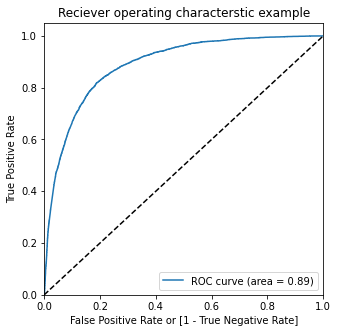

In [61]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

## Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.084217,18391,0,1,0,0,0,0,0,0,0,0,0
1,0,0.069297,13056,0,1,0,0,0,0,0,0,0,0,0
2,0,0.037968,13415,0,1,0,0,0,0,0,0,0,0,0
3,0,0.191855,21022,0,1,1,0,0,0,0,0,0,0,0
4,0,0.095957,24510,0,1,0,0,0,0,0,0,0,0,0


In [64]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.117231  1.000000  0.000000
0.1   0.1  0.798717  0.833423  0.794108
0.2   0.2  0.882611  0.615094  0.918137
0.3   0.3  0.898031  0.487332  0.952572
0.4   0.4  0.901286  0.402426  0.967534
0.5   0.5  0.901254  0.329380  0.977199
0.6   0.6  0.900180  0.268194  0.984107
0.7   0.7  0.895346  0.185175  0.989655
0.8   0.8  0.890574  0.116173  0.993414
0.9   0.9  0.886561  0.058221  0.996564


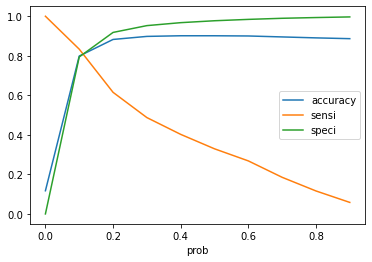

In [65]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

###### From the curve above, 0.15 is the optimum point to take it as a cutoff probability

In [66]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>0.15 else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.084217,18391,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.069297,13056,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.037968,13415,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.191855,21022,0,1,1,0,0,0,0,0,0,0,0,1
4,0,0.095957,24510,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.final_predicted)

0.8584699971561286

In [68]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.final_predicted)
confusion2

array([[24520,  3417],
       [ 1062,  2648]], dtype=int64)

In [69]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [70]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7137466307277628

In [71]:
# Let us calculate specificity
TN/float(TN+FP)

0.8776890861581416

In [72]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.12231091384185847

In [73]:
# Positive predictive value 
TP/float(TP+FP)

0.43660346248969495

In [74]:
# Negative predictive value
TN/float(TN+ FN)

0.9584864357751544

### Precision and Recall:

In [75]:
# Looking at the confusion matrix again
confusion

array([[27304,   633],
       [ 2486,  1224]], dtype=int64)

In [76]:
# Second confusion matrix
confusion2

array([[24520,  3417],
       [ 1062,  2648]], dtype=int64)

#### Precision:

TP / TP + FP

In [77]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6591276252019386

#### Recall:

TP / TP + FN

In [79]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.3299191374663073

#### Using sklearn utilities for finding precision and recall

In [80]:
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6573426573426573

In [81]:
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.3293800539083558

## Step 9: Precision and Recall takeoff

In [82]:
y_train_pred_final.Sub, y_train_pred_final.predict

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31642    0
 31643    0
 31644    0
 31645    0
 31646    0
 Name: Sub, Length: 31647, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31642    0
 31643    0
 31644    0
 31645    0
 31646    0
 Name: predict, Length: 31647, dtype: int64)

In [83]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

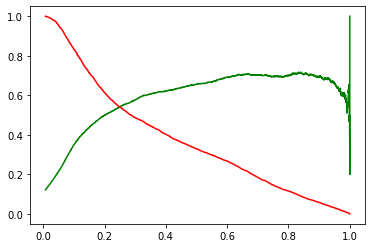

In [84]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 10: Making predictions on Test data

In [85]:
# transforming the test data
x_test[['age','balance','duration']] = scaler.transform(x_test[['age','balance','duration']])

In [86]:
x_test = x_test[col1]
x_test.head()

,housing,loan,duration,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,single,joblue.collar,johousemaid,joself.employed,joservices,jostudent,jotechnician
14789,0,1,-0.403616,0,0,0,1,1,0,0,1,1,0,0,0,0,0
8968,0,0,-0.310613,0,0,0,1,0,0,1,0,0,0,0,0,0,0
34685,1,0,-0.740752,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2369,1,0,-0.213735,0,0,0,1,0,0,1,1,0,0,0,0,0,0
36561,1,0,1.444816,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [87]:
x_test_sm = sm.add_constant(x_test)

#### Making predictions on the test data:

In [88]:
y_test_pred = res.predict(x_test_sm)

In [89]:
y_test_pred[:10]

14789    0.046055
8968     0.031751
34685    0.039532
2369     0.021278
36561    0.781652
22611    0.088953
5137     0.124307
1491     0.029924
34610    0.031958
33988    0.039884
dtype: float64

In [90]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [91]:
y_pred_1.head()

,0
14789,0.046055
8968,0.031751
34685,0.039532
2369,0.021278
36561,0.781652


In [92]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [94]:
# Putting Cust_id to index
y_test_df['Cust_id'] = y_test_df.index

In [95]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [96]:
# Appending y_test_df and y_pred_1
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [97]:
y_pred.head()

,y,Cust_id,0
0,0,14789,0.046055
1,0,8968,0.031751
2,0,34685,0.039532
3,0,2369,0.021278
4,0,36561,0.781652


In [98]:
# renaming the columns
y_pred.rename(columns={'y':'Sub',0:'Sub_prob'},inplace=True)

In [99]:
y_pred.head()

,Sub,Cust_id,Sub_prob
0,0,14789,0.046055
1,0,8968,0.031751
2,0,34685,0.039532
3,0,2369,0.021278
4,0,36561,0.781652


In [100]:
# putting the limit of 0.25 from the precision_recall_curve
y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [101]:
y_pred.head()

,Sub,Cust_id,Sub_prob,final_predict
0,0,14789,0.046055,0
1,0,8968,0.031751,0
2,0,34685,0.039532,0
3,0,2369,0.021278,0
4,0,36561,0.781652,1


In [102]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.8901503981126512

In [103]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[11246,   739],
       [  751,   828]], dtype=int64)

In [104]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.5243825205826472

In [106]:
# Let us calculate specificity
TN/float(TN+FP)

0.9383395911556112